PROJECT 2

PART (1) QUESTION (1.1) There are 4039 Nodes and 88234 Edges

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !pip install igraph
# !pip install python-igraph==0.10.4
# !pip uninstall python-igraph==0.10.4 -y
!pip install python-igraph==0.9.6
!pip install cairocffi

Found existing installation: python-igraph 0.10.4
Uninstalling python-igraph-0.10.4:
  Successfully uninstalled python-igraph-0.10.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached python-igraph-0.9.6.tar.gz (3.6 MB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
^C
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cairocffi
cairocffi.install_as_pycairo()
import cairo
assert cairo is cairocffi

In [4]:
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

PART (1) QUESTION (1.2) The graph is connected:

In [5]:
path = '/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/facebook_combined.txt'

# Load file
data = np.loadtxt(path, dtype=int)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['source', 'target'])

# Create graph
g = igraph.Graph.DataFrame(df, directed=False)

# Print the graph summary
print(g.summary())

IGRAPH U--- 4039 88234 -- 


In [6]:
# Check if the graph is connected
if g.is_connected():
    print("The graph is connected!")
else:
    print("The graph is not connected!")
        # Get the size of the GCC
    gcc = g.clusters().giant()
    print("The size of the GCC is:", gcc.vcount())

The graph is connected!


PART 1 QUESTION (2)

In [7]:
# Find the diameter of the graph
diameter = g.diameter()
print("The diameter of the graph is:", diameter)

The diameter of the graph is: 8


PART 1 QUESTION (3)

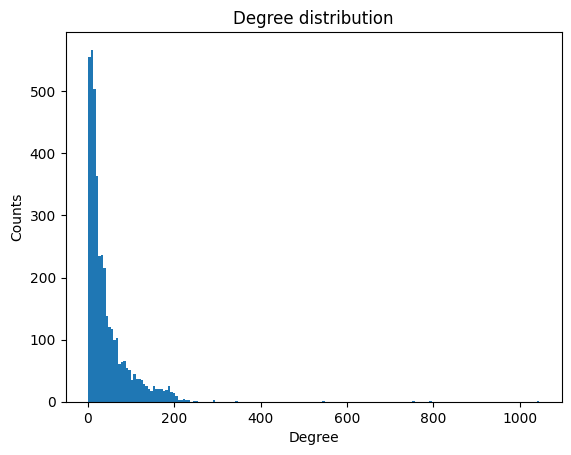

The average degree of the graph is: 43.69101262688784


In [ ]:
# Compute the degree of each vertex in the graph
degree = g.degree()

# Compute the degree distribution
degree_dist = g.degree_distribution()

# Plot the degree distribution
plt.hist(degree, 'auto')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Report the average degree
avg_degree = sum(degree) / len(degree)
print("The average degree of the graph is:", avg_degree)

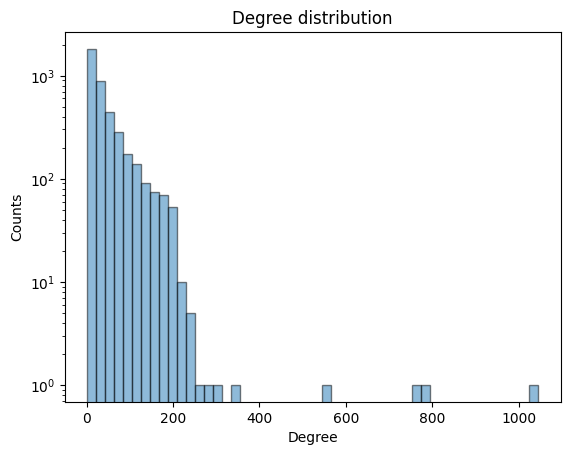

The slope of the linear fit is:  -0.21303107322226497
slope is  -0.2130310732222649


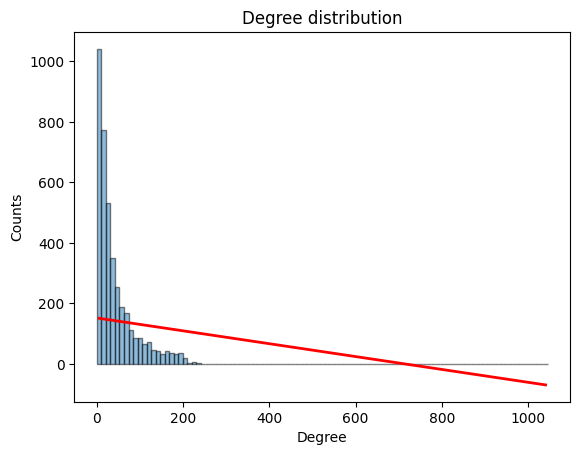

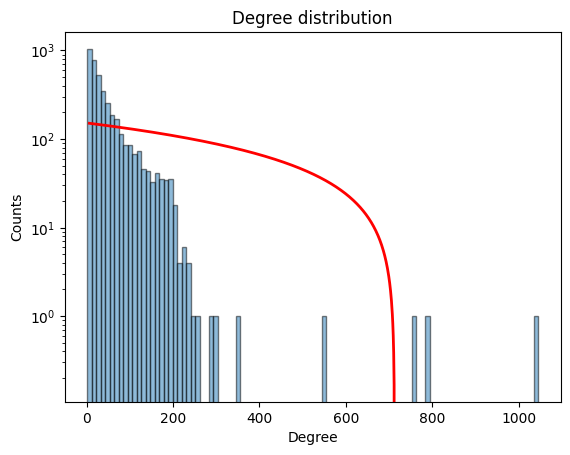

In [ ]:
# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=False, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

# Fit a linear model to the log-transformed data
x = bins[:-1] + np.diff(bins) / 2
y = counts
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print("The slope of the linear fit is: ", slope)

# Plot the linear fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, 'r-', lw=2)

# recheck slope
slope = (yfit[100] - yfit[0])/(xfit[100]-xfit[0])
print('slope is ',slope)

plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

plt.plot(xfit, yfit, 'r-', lw=2)

plt.show()

-----------------PART 2--------------------------------

PART 2 QUESTION (5)

IGRAPH U--- 348 2866 -- 


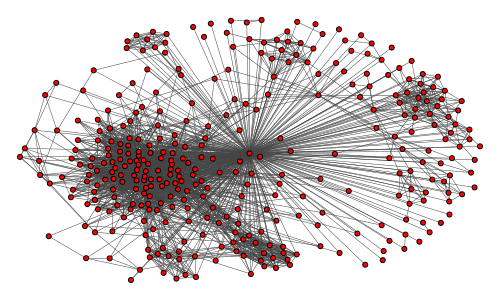

In [8]:
node_id = 0
node_neighbors = g.neighbors(node_id)
node_neighbors.append(node_id)
personalized_network = g.induced_subgraph(node_neighbors)

print(personalized_network.summary())

layout = personalized_network.layout('auto')
igraph.plot(personalized_network, layout=layout, vertex_size=5, edge_width=0.5, bbox=(500, 300), mark_groups=True)

There are 348 Nodes, and 2866 Edges.

PART 2 QUESTION (6)

In [ ]:
diameter = personalized_network.diameter()
print(diameter)

2


The upper bound of the diameter is 2, since the network is defined as a node and it's immediate neighbors, then any 2 nodes will be connected by at most 2 edges through node 0.

For the lower bound, if node 0 is connected to all of its neighbors and all of its neighbors are connected to each other, then the lower bound of the diameter is 1.

PART 2 QUESTION (7)

For the upper bound, this would mean that their exists 2 nodes that are not connected to each other but are connected through node 0. So the shortest path between the nodes is 2 edges, making the diameter 2.

For the lower bound, it means that node 0 is directly connected to all of its neighbors, and all of its neighbors are directly connected to each other. The network would be a complete graph, and there is a direct path of length 1 between any two nodes in the personalized network.

-------------------------PART 3------------------------

PART 3 QUESTION (8)

In [ ]:
# Count the core nodes
num_core_nodes = 0
avg_degree = 0
for node in g.vs:
    degree = g.neighborhood_size(node.index)
    if  degree > 200:
        num_core_nodes += 1
        avg_degree += degree

print("Number of core nodes: ", num_core_nodes)
print("Average degree: ", avg_degree / num_core_nodes)

Number of core nodes:  41
Average degree:  278.4390243902439


PART 3 QUESTION (9)

In [ ]:
from random import randint

# Initialize dictionary to store community assignments
communities = {}

core_nodes = 0, 107, 348, 483, 1086

# Iterate over the 5 core nodes
for core_node in core_nodes:
    node_neighbors = g.neighbors(core_node)
    node_neighbors.append(core_node)
    personalized_network = g.induced_subgraph(node_neighbors)
    
    # Fast-Greedy algorithm
    fg_clusters = personalized_network.community_fastgreedy().as_clustering()
    fg_membership = fg_clusters.membership
    fg_modularity = fg_clusters.modularity

    # Edge-Betweenness algorithm
    eb_clusters = personalized_network.community_edge_betweenness().as_clustering()
    eb_membership = eb_clusters.membership
    eb_modularity = eb_clusters.modularity

    # Infomap algorithm
    im_clusters = personalized_network.community_infomap()
    im_membership = im_clusters.membership
    im_modularity = im_clusters.modularity

    # Store community assignments for the current core node
    communities[core_node] = {"fast-greedy": fg_membership,
                              "edge-betweenness": eb_membership,
                              "infomap": im_membership}

    # Print modularity scores for the 3 algorithms
    print("Core node", core_node)
    print("Fast-Greedy modularity:", fg_modularity)
    print("Edge-Betweenness modularity:", eb_modularity)
    print("Infomap modularity:", im_modularity)


Core node 0
Fast-Greedy modularity: 0.4131013728342347
Edge-Betweenness modularity: 0.3533021725463346
Infomap modularity: 0.3891184710509771
Core node 107
Fast-Greedy modularity: 0.43592937602647497
Edge-Betweenness modularity: 0.5067549165389015
Infomap modularity: 0.508249171320581
Core node 348
Fast-Greedy modularity: 0.2517148585433312
Edge-Betweenness modularity: 0.1335280213700778
Infomap modularity: 0.09602908023753425
Core node 483
Fast-Greedy modularity: 0.5070016421965142
Edge-Betweenness modularity: 0.48909518024480303
Infomap modularity: 0.515278752174842
Core node 1086
Fast-Greedy modularity: 0.14553149956549322
Edge-Betweenness modularity: 0.027623772388463967
Infomap modularity: 0.02690661722333557


In [ ]:
# Generate colors for visualization
colors = []
for i in range(max(max(communities.values(), key=lambda x: max([max(x[i]) for i in x])), key=str)+1):
    colors.append((randint(0, 255), randint(0, 255), randint(0, 255)))

# Set the color of each node based on its community membership
for node in personalized_network.vs:
    for core_node in core_nodes[:5]:
        node_id = node.index
        if node_id in communities[core_node]["fast-greedy"]:
            node["color"] = colors[communities[core_node]["fast-greedy"].index(node_id)]
        elif node_id in communities[core_node]["edge-betweenness"]:
            node["color"] = colors[communities[core_node]["edge-betweenness"].index(node_id)]
        elif node_id in communities[core_node]["infomap"]:
            node["color"] = colors[communities[core_node]["infomap"].index(node_id)]

# Plot the personalized network with colored nodes
plt.plot(personalized_network, vertex_size=10)

TypeError: ignored